## 數據分析三階段:
* 1.把想解決的問題化成函數(數學建模)
* 2.以歷史資料找出這個函數(回歸、機器學習、神經網路)
* 3.評估是否符合需求(有沒有準確)

# 6-4 模擬線性回歸的數據

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 準備模擬的資料
#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 50 個點

In [2]:
x = np.linspace(0,5,50)

In [3]:
y = 1.2*x + 0.8

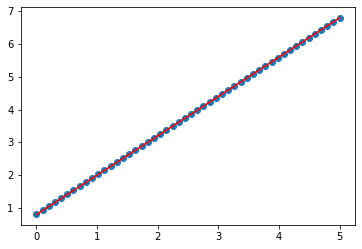

In [4]:
plt.scatter(x,y)
plt.plot(x, y, "r")

## 加入 noise 項, 看來更真實

大概的想法就是, 我們真實世界的問題化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上,我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [5]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)

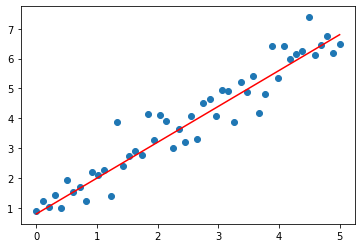

In [6]:
plt.scatter(x,y)
plt.plot(x ,1.2*x+0.8 , "r")

# 6-5 假的資料真的回歸

## 做線性迴歸找出那條線
做線性迴歸有很多套件, 但我們這裡用 `sklearn` 裡的 `LinearRegression` 來做線性迴歸。

In [7]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [8]:
y

array([0.90946703, 1.21713521, 1.01535188, 1.41774977, 0.98221855,
       1.93606656, 1.54751543, 1.68754104, 1.24770146, 2.20750743,
       2.09933414, 2.27177075, 1.4034552 , 3.8844248 , 2.41752773,
       2.73136623, 2.8957034 , 2.75886071, 4.13216376, 3.28298804,
       4.11701003, 3.89419637, 3.00069119, 3.65769506, 3.22415465,
       4.06232146, 3.29492448, 4.49889152, 4.66035841, 4.07827711,
       4.94392946, 4.90563633, 3.86407272, 5.21023622, 4.88597913,
       5.4239926 , 4.17283676, 4.8162207 , 6.42076457, 5.35722795,
       6.42056911, 5.99871002, 6.144641  , 6.24615602, 7.40390467,
       6.11936331, 6.44675224, 6.75634171, 6.19744965, 6.47674645])

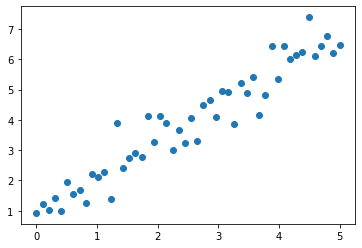

In [9]:
plt.scatter(x,y)

這裡要注意我們本來的 x 是

$$[x_1, x_2, \ldots, x_{50}]$$

但現在要的是

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

這樣的。

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# 開線性回歸機的方法：機器的變數名稱 = LinearRegression()
regr = LinearRegression()

In [12]:
# 在使用LinearRegression功能前，須將每個訓練資料括起來(當作一列)，亦即將原先10*5的矩陣，變成50*1的陣列
# 改變array形狀的方法：array的變數名.reshape(新的形狀)
X = x.reshape(50,1)

In [13]:
X

array([[0.        ],
       [0.10204082],
       [0.20408163],
       [0.30612245],
       [0.40816327],
       [0.51020408],
       [0.6122449 ],
       [0.71428571],
       [0.81632653],
       [0.91836735],
       [1.02040816],
       [1.12244898],
       [1.2244898 ],
       [1.32653061],
       [1.42857143],
       [1.53061224],
       [1.63265306],
       [1.73469388],
       [1.83673469],
       [1.93877551],
       [2.04081633],
       [2.14285714],
       [2.24489796],
       [2.34693878],
       [2.44897959],
       [2.55102041],
       [2.65306122],
       [2.75510204],
       [2.85714286],
       [2.95918367],
       [3.06122449],
       [3.16326531],
       [3.26530612],
       [3.36734694],
       [3.46938776],
       [3.57142857],
       [3.67346939],
       [3.7755102 ],
       [3.87755102],
       [3.97959184],
       [4.08163265],
       [4.18367347],
       [4.28571429],
       [4.3877551 ],
       [4.48979592],
       [4.59183673],
       [4.69387755],
       [4.795

In [14]:
# 開始讓線性回歸機學習的方法：機器的變數名稱.fit(輸入資料,正確答案)
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# 開始預測的方法：機器的變數名稱.predict(輸入資料)
Y = regr.predict(X)

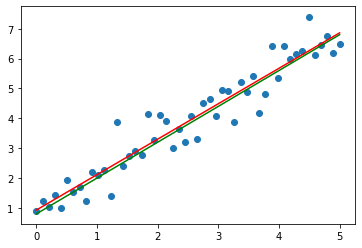

In [16]:
plt.scatter(x ,y)   # 預測的點
plt.plot(X,Y,"r")   # 預測答案函數
plt.plot(x, 1.2*x +0.8,"g")   # 正確答案函數